# SAX representation of synthetic data

In this notebook, I play with synthetic temporal data. Time series analysis isn't my strongest suit, so I first generate a synthetic timeseries and visulize it. Then, I follow through the sample code of tslearn, a python library that implements SAX.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import timesynth as ts

## Generating synthetic temporal data (univariate)

Text(0.5,1,'Irregularly sampled sinusoid with red noise')

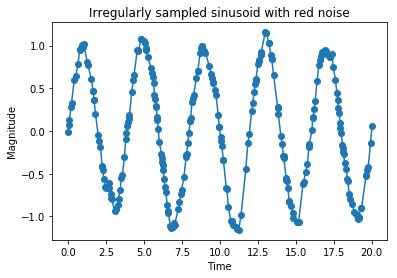

In [3]:
# Initializing TimeSampler
time_sampler = ts.TimeSampler(stop_time=20)
# Sampling irregular time samples
irregular_time_samples = time_sampler.sample_irregular_time(num_points=500, keep_percentage=50)
# Initializing Sinusoidal signal
sinusoid = ts.signals.Sinusoidal(frequency=0.25)
# Initializing Gaussian noise
red_noise = ts.noise.RedNoise(std=0.5, tau=0.8)
# Initializing TimeSeries class with the signal and noise objects
timeseries_corr = ts.TimeSeries(sinusoid, noise_generator=red_noise)
# Sampling using the irregular time samples
samples_corr, signals_corr, errors_corr = timeseries_corr.sample(irregular_time_samples)
# Plotting the series
plt.plot(irregular_time_samples, samples_corr, marker='o')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Irregularly sampled sinusoid with red noise')

## SAX representation of temporal data with tslearn

In [4]:
import numpy
import matplotlib.pyplot as plt

from tslearn.generators import random_walks
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation, OneD_SymbolicAggregateApproximation

numpy.random.seed(0)
# Generate a random walk time series
n_ts, sz, d = 1, 100, 1
dataset = random_walks(n_ts=n_ts, sz=sz, d=d)
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
dataset = scaler.fit_transform(dataset)
dataset

array([[[-0.75643578],
        [-0.67590556],
        [-0.47893803],
        [-0.02796624],
        [ 0.34787316],
        [ 0.15119946],
        [ 0.34240137],
        [ 0.31194128],
        [ 0.29116885],
        [ 0.37380034],
        [ 0.40278859],
        [ 0.69545596],
        [ 0.8486121 ],
        [ 0.87309876],
        [ 0.96242466],
        [ 1.02957543],
        [ 1.33025353],
        [ 1.28896615],
        [ 1.35196992],
        [ 1.18008619],
        [ 0.66630607],
        [ 0.79784449],
        [ 0.9718092 ],
        [ 0.82245113],
        [ 1.27923117],
        [ 0.98654525],
        [ 0.99575399],
        [ 0.95808391],
        [ 1.26655027],
        [ 1.56225349],
        [ 1.59343611],
        [ 1.66953997],
        [ 1.49087625],
        [ 1.09224801],
        [ 1.02223193],
        [ 1.0536966 ],
        [ 1.30128822],
        [ 1.54326289],
        [ 1.46531475],
        [ 1.40447739],
        [ 1.19345984],
        [ 0.90768628],
        [ 0.56430548],
        [ 0

In [5]:
#plt.figure()
#plt.subplot(2, 2, 1)  # First, raw time series
plt.plot(dataset[0].ravel(), "b-")
plt.title("Raw time series")

Text(0.5,1,'Raw time series')

In [6]:
# PAA transform (and inverse transform) of the data
n_paa_segments = 10
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
paa_dataset_inv = paa.inverse_transform(paa.fit_transform(dataset))

#plt.subplot(2, 2, 2)  # Second, PAA
plt.plot(dataset[0].ravel(), "b-", alpha=0.4)
plt.plot(paa_dataset_inv[0].ravel(), "b-")
plt.title("PAA")

Text(0.5,1,'PAA')

Text(0.5,1,'SAX, 8 symbols')

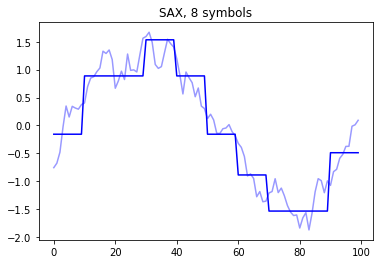

In [7]:
# SAX transform
n_sax_symbols = 8
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
sax_dataset_inv = sax.inverse_transform(sax.fit_transform(dataset))

#plt.subplot(2, 2, 3)  # Then SAX
plt.plot(dataset[0].ravel(), "b-", alpha=0.4)
plt.plot(sax_dataset_inv[0].ravel(), "b-")
plt.title("SAX, %d symbols" % n_sax_symbols)

In [8]:
# 1d-SAX transform
n_sax_symbols_avg = 8
n_sax_symbols_slope = 8
one_d_sax = OneD_SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols_avg,
                                                alphabet_size_slope=n_sax_symbols_slope)
one_d_sax_dataset_inv = one_d_sax.inverse_transform(one_d_sax.fit_transform(dataset))


#plt.subplot(2, 2, 4)  # Finally, 1d-SAX
plt.plot(dataset[0].ravel(), "b-", alpha=0.4)
plt.plot(one_d_sax_dataset_inv[0].ravel(), "b-")
plt.title("1d-SAX, %d symbols (%dx%d)" % (n_sax_symbols_avg * n_sax_symbols_slope,
                                          n_sax_symbols_avg,
                                          n_sax_symbols_slope))

Text(0.5,1,'1d-SAX, 64 symbols (8x8)')